In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from warnings import filterwarnings
%matplotlib inline
filterwarnings('ignore')

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from statistics import mean, stdev
from math import sqrt

In [3]:
df = pd.read_csv('Pies vs Waffles_May 3, 2018_21.52 2.csv', skiprows = [0,1])

In [4]:
print("Total Number of Surveys = ", len(df))

Total Number of Surveys =  210


In [5]:
# rename columns
old_names = df.columns
new_names = []
for old_name in old_names:
    new_name = eval(old_name)['ImportId']
    new_names.append(new_name)
    
df.columns = new_names

In [126]:
def plot_distributions(list_to_graph, list_names, x, y, title, real_val, print_val = True):
    fig, ax = plt.pyplot.subplots()
    for i, data in enumerate(list_to_graph):
        sns.set_style("white")
        sns.distplot(data, hist = False, kde_kws={"label":list_names[i]})
    ax.set(xlabel= x, ylabel= y)
    ax.set_title(title, size=12.5, weight='bold')
    if print_val:
        ax.axvline(x=real_val, linewidth=1, color='r')
        lim_y = ax.get_ylim()
        lim_x = ax.get_xlim()
        plt.pyplot.text(real_val - ((lim_y[1] - lim_y[0])/7) , (lim_y[1] - lim_y[0])/10,'value', rotation = 90)

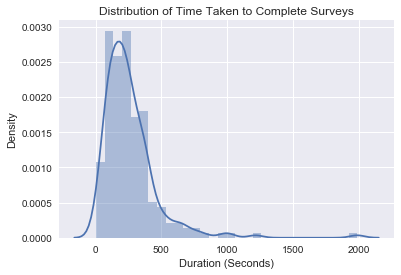

In [19]:
# plot time taken to complete each survey
def make_plot(df, col_name, x, y, title):
    ax = sns.distplot(df[col_name])
    ax.set(xlabel= x, ylabel= y)
    ax.set_title(title)
        
make_plot(df, 'duration', 'Duration (Seconds)', 'Density', "Distribution of Time Taken to Complete Surveys")

## Question 1

### Does the perception of one slice/area depend on the size of the other slices/areas?

In [15]:
def exact_accuracy(df,correct_answer):
    df = pd.DataFrame(df)
    df.columns = ['value']
    correct = len(df[(df['value'] == correct_answer)])
    return correct/len(df)

def accuracy(df,correct_answer,n):
    df = pd.DataFrame(df)
    df.columns = ['value']
    correct = len(df.loc[df['value'].isin(range(correct_answer - n,correct_answer + n + 1))])
    return correct/len(df)

def cohens_d(pie, waffle):
    c0 = np.asarray(pie)
    c1 = np.asarray(waffle)
    cohens_d = (mean(c0) - mean(c1)) / (sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2))
    return cohens_d
    

In [110]:
pie1 = df[(df['QID1_1'].notnull())]['QID1_1']
pie2 = df[(df['QID3_1'].notnull())]['QID3_1']
pie3 = df[(df['QID4_1'].notnull())]['QID4_1']
pie4 = df[(df['QID5_1'].notnull())]['QID5_1']
pies = [pie1, pie2, pie3, pie4]
waffle1 = df[(df['QID7_1'].notnull())]['QID7_1']
waffle2 = df[(df['QID8_1'].notnull())]['QID8_1']
waffle3 = df[(df['QID9_1'].notnull())]['QID9_1']
waffle4 = df[(df['QID10_1'].notnull())]['QID10_1']
waffles = [waffle1, waffle2, waffle3, waffle4]

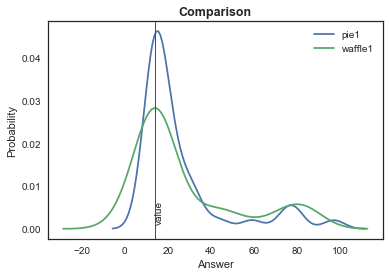

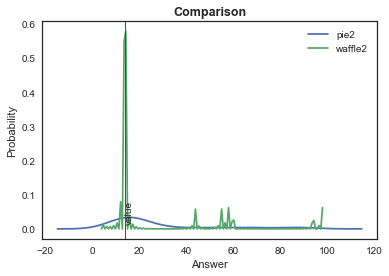

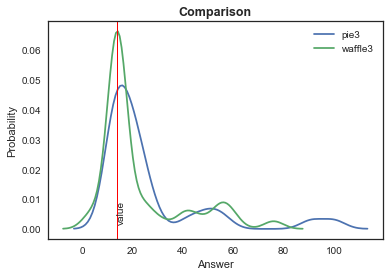

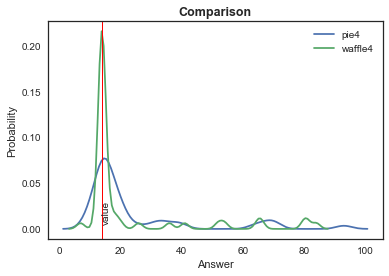

In [127]:
# Among categories
names = ["pie1", "waffle1"]
plot_distributions([pie1, waffle1], names, "Answer", "Probability", "Comparison", 14)

names = ["pie2", "waffle2"]
plot_distributions([pie2, waffle2], names, "Answer", "Probability", "Comparison", 14)

names = ["pie3", "waffle3"]
plot_distributions([pie3, waffle3], names, "Answer", "Probability", "Comparison", 14)

names = ["pie4", "waffle4"]
plot_distributions([pie4, waffle4], names, "Answer", "Probability", "Comparison", 14)

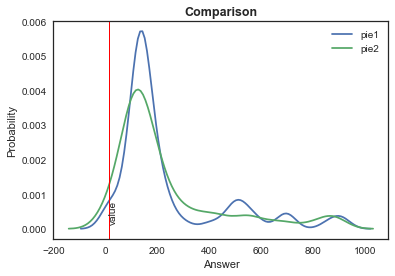

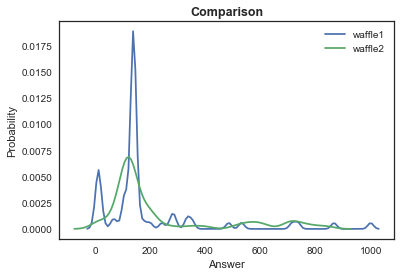

In [128]:
# Intercategory
names = ["pie1", "pie2", "pie3", "pie4"]
plot_distributions(pies, names, "Answer", "Probability", "Comparison", 14)

names = ["waffle1", "waffle2", "waffle3", "waffle4"]
plot_distributions(waffles, names, "Answer", "Probability", "Comparison", 14, False)

## Question 2 : Total number of observations

In [224]:
pie1000 = df[(df['QID13_1'].notnull())]['QID13_1']
pie874 = df[(df['QID14_1'].notnull())]['QID14_1']
pies = [pie1000,pie874]
waffle1000 = df[(df['QID18_1'].notnull())]['QID18_1']
waffle874 = df[(df['QID19_1'].notnull())]['QID19_1']
waffles = [waffle1000,waffle874]

In [112]:
pie1000 = df[(df['QID13_1'].notnull())]['QID13_1']
pie874 = df[(df['QID14_1'].notnull())]['QID14_1']
pies = [pie1000,pie874]
waffle1000 = df[(df['QID18_1'].notnull())]['QID18_1']
waffle874 = df[(df['QID19_1'].notnull())]['QID19_1']
waffles = [waffle1000,waffle874]

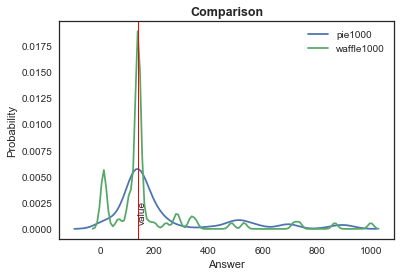

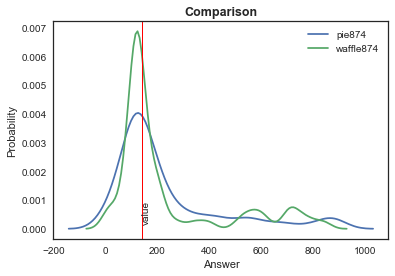

In [125]:
# Pie Vs Waffle
names = ["pie1000", "waffle1000"]
plot_distributions([pie1000, waffle1000], names, "Answer", "Probability", "Comparison", 140)

names = ["pie874", "waffle874"]
plot_distributions([pie874, waffle874], names, "Answer", "Probability", "Comparison", 140)

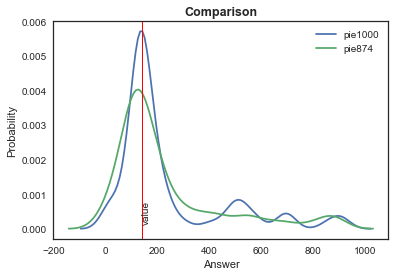

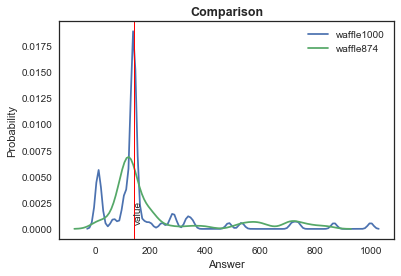

In [122]:
# Among categories
names = ["pie1000", "pie874"]
plot_distributions([pie1000, pie874], names, "Answer", "Probability", "Comparison", 140)

names = ["waffle1000", "waffle874"]
plot_distributions([waffle1000, waffle874], names, "Answer", "Probability", "Comparison", 140)

## Question 3 

### Comparison : Adjacent vs Not

In [236]:
p1 = df[(df['QID23'].notnull())]['QID23']
p2 = df[(df['QID28'].notnull())]['QID28']
p3 = df[(df['QID29'].notnull())]['QID29']
p4 = df[(df['QID30'].notnull())]['QID30']
p5 = df[(df['QID31'].notnull())]['QID31']

w1 = df[(df['QID32'].notnull())]['QID32']
w2 = df[(df['QID33'].notnull())]['QID33']
w3 = df[(df['QID34'].notnull())]['QID34']
w4 = df[(df['QID35'].notnull())]['QID35']
w5 = df[(df['QID36'].notnull())]['QID36']

pie_adjacent = p1.append(p2).append(p3)
pie_opposite = p4.append(p5)

waffle_adjacent = w1.append(w2).append(w3)
waffle_opposite = w4.append(w5)

pies = [pie_adjacent, pie_opposite]
waffles = [waffle_adjacent, waffle_opposite]

# Question 5

### Sums : Adjacent vs Not